In [1]:
import pandas as pd 
클러스터링=pd.read_csv("c:/data/project/team/revised/클러스터링.csv",encoding='cp949',index_col=0) 
편의점=pd.read_csv("c:/data/project/team/revised/최종데이터파일.csv",encoding='cp949',index_col=0) 
편의점최종=pd.merge(클러스터링,편의점).set_index('상권코드',drop=True)


In [2]:
매출이높은상권=편의점최종[편의점최종['분류']==1]


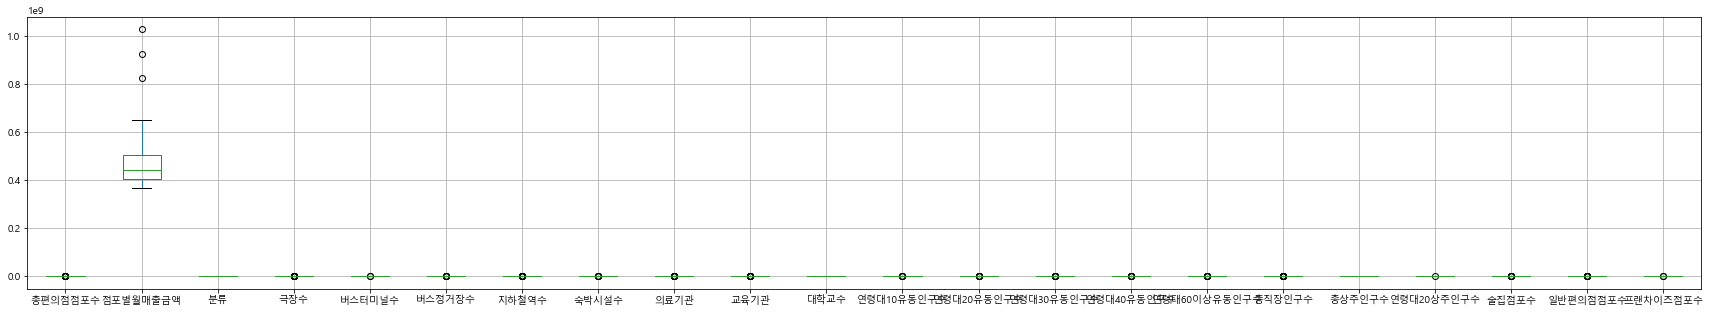

In [3]:
# 카페.loc[:,[-'점포별월매출금액']]
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
매출이높은상권.iloc[:,:-1].boxplot(figsize=(30,5))

In [4]:
매출이높은상권.columns

Index(['총편의점점포수', '점포별월매출금액', '분류', '극장수', '버스터미널수', '버스정거장수', '지하철역수',
       '숙박시설수', '의료기관', '교육기관', '대학교수', '연령대10유동인구수', '연령대20유동인구수',
       '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수', '총직장인구수', '총상주인구수',
       '연령대20상주인구수', '술집점포수', '일반편의점점포수', '프랜차이즈점포수', '생존률'],
      dtype='object')

In [5]:
cols=['총편의점점포수', '점포별월매출금액', '극장수', '버스터미널수', '버스정거장수', '지하철역수',
       '숙박시설수', '의료기관', '교육기관', '대학교수', '연령대10유동인구수', '연령대20유동인구수',
       '연령대30유동인구수', '연령대40유동인구수', '연령대60이상유동인구수', '총직장인구수', '총상주인구수',
       '연령대20상주인구수', '술집점포수', '일반편의점점포수', '프랜차이즈점포수']
X=매출이높은상권[cols] #독립변수
y=매출이높은상권['생존률'] #종속변수

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)
Xt_scaled=scaler.fit_transform(X_test)

In [8]:

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


In [9]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1.389
Date:                Mon, 30 Nov 2020   Prob (F-statistic):              0.205
Time:                        19:45:10   Log-Likelihood:                 50.467
No. Observations:                  50   AIC:                            -60.93
Df Residuals:                      30   BIC:                            -22.69
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
총편의점점포수        -13.8077      1.603     -8.615      0.000     -17.081     -10.534
점포별월매출금액         0.2696      0.149      1.812      0.080      -0.034       0.574
극장수              0.1646      0.387      0.426      0.673      -0.625       0.954
버스터미널수          -0.2354      0.346     -0.681      0.501      -0.941       0.470
버스정거장수           0.0248      0.103      0.241      0.811      -0.185       0.234
지하철역수           -0.2456      0.140     -1.753      0.090      -0.532       0.041
숙박시설수           -0.1855      0.138     -1.343      0.190      -0.468       0.097
의료기관             0.0152      0.096      0.159      0.875      -0.181       0.211
교육기관             0.1732      0.084      2.064      0.048       0.002       0.345
대학교수         -2.315e-14   3.61e-15     -6.416      0.000   -3.05e-14   -1.58e-14
연령대10유동인구수      -0.6710      0.755     -0.889      0.381      -2.212       0.870
연령대20유동인구수       0.5054      1.171      0.432      0.669      -1.886       2.896
연령대30유동인구수      -0.5400      1.042     -0.518      0.608      -2.668       1.589
연령대40유동인구수       1.5191      1.518      1.000      0.325      -1.582       4.620
연령대60이상유동인구수    -0.5170      0.558     -0.927      0.362      -1.656       0.623
총직장인구수          -0.4428      0.415     -1.067      0.294      -1.290       0.405
총상주인구수          -0.1977      0.194     -1.018      0.317      -0.594       0.199
연령대20상주인구수       0.3690      0.332      1.111      0.275      -0.309       1.047
술집점포수           -0.1665      0.302     -0.551      0.586      -0.784       0.451
일반편의점점포수         6.2059      0.713      8.699      0.000       4.749       7.663
프랜차이즈점포수         8.5350      0.918      9.300      0.000       6.661      10.409
==============================================================================
Omnibus:                        0.433   Durbin-Watson:                   2.379
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.121
Skew:                           0.114   Prob(JB):                        0.941
Kurtosis:                       3.078   Cond. No.                     5.90e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.24e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
19,956.772737,총편의점점포수
18,516.919891,프랜차이즈점포수
17,288.846673,연령대40유동인구수
16,197.596530,연령대30유동인구수
15,153.152431,연령대20유동인구수
14,152.503157,일반편의점점포수
13,65.230488,연령대10유동인구수
12,42.960912,연령대60이상유동인구수
11,29.110943,극장수
10,20.317295,총직장인구수


In [11]:
cols=[ '점포별월매출금액', '버스정거장수',
         '교육기관','연령대20상주인구수', '술집점포수']
X=편의점[cols]
y=편의점['생존률'] #종속변수]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()  
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test),columns=X.columns)


In [14]:
import statsmodels.api as sm 
model1=sm.OLS(y_train.values,X_train_scaled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              923.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:45:10   Log-Likelihood:                          61.589
No. Observations:                 820   AIC:                                     -113.2
Df Residuals:                     815   BIC:                                     -89.63
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
점포별월매출금액       1.2199      0.051     23.930      0.000       1.120       1.320
버스정거장수         0.6658      0.092      7.222      0.000       0.485       0.847
교육기관           0.2359      0.072      3.258      0.001       0.094       0.378
연령대20상주인구수     0.8258      0.040     20.624      0.000       0.747       0.904
술집점포수         -0.5145      0.177     -2.904      0.004      -0.862      -0.167
==============================================================================
Omnibus:                       31.572   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.021
Skew:                          -0.412   Prob(JB):                     5.54e-09
Kurtosis:                       3.658   Cond. No.                         8.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#다중공선성 문제를 해결하기 위하여 vif 확인
#vif(Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(X_train_scaled.values, i) for i in range(X.shape[1])]
vif['features']=X_train_scaled.columns 
vif=vif.sort_values('VIF Factor').reset_index(drop=True)
vif.sort_values(by='VIF Factor', ascending=False).head(50)

,VIF Factor,features
4,2.319471,버스정거장수
3,2.246477,점포별월매출금액
2,2.158066,연령대20상주인구수
1,1.735296,술집점포수
0,1.200651,교육기관
